# The 2000 U.S. Presidential Election

The 2000 presidential election---between Republican George W. Bush, Democrat Al Gore, and other third-party candidates---was one of the closest in American history. The election came down to one state, Florida, which Bush won by just 537 votes (out of nearly 6,000,000 votes cast in the state).

After Election Day, Democrats claimed that the "butterfly ballot" that was used in Palm Beach County confused Gore voters into voting for Reform Party candidate Pat Buchanan. The ballot in question is shown below. To vote for Gore, who is listed second on the left, a voter actually had to punch the third hole (because the second hole is actually a vote for Buchanan, who is listed first on the right).

![](butterfly.jpg)

In this lab, you will evaluate this. The data file `https://raw.githubusercontent.com/dlsun/data-science-book/master/data/florida.csv` contains county-level information about:

- the number of votes for Gore, Bush, Buchanan (and a few other candidates) in the 2000 presidential election
- the number of votes for Clinton (Democrat), Dole (Republican), and Perot (Reform) in the 1996 presidential election
- the number of votes for Buchanan in the 1996 primary
- the number of registered Reform voters and the total number of registered voters

Using this data, evaluate the claim that many voters in Palm Beach County voted for Buchanan when they intended to vote for Gore. (_Hint:_ You should check whether Palm Beach County fits the general pattern of the other counties in Florida. Visualizations will likely be more helpful than summary statistics.) Then, craft a story that guides the reader through your discoveries. Your story should contain both figures and explanations.

In [11]:
import pandas as pd
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/dlsun/data-science-book/master/data/florida.csv")
top_df = df.loc[0:48, :]
bottom_df = df.loc[49:, :]
bottom_df.loc[49, "country"] = 'PASCO'
pb = bottom_df.loc[66, "county":"buchanan96p"]
bottom_df.loc[:, "county":"buchanan96p"] = (bottom_df
                .loc[:, "county":"buchanan96p"].shift(1))
bottom_df.loc[49, "county":"buchanan96p"] = pb
votes_df = top_df.append(bottom_df)
votes_df = (votes_df.set_index("county")
            [['buchanan2000', 'gore2000', 'bush2000',
              'nader2000', 'browne2000', 'reform.reg', 'total.reg']])
for col in votes_df:
    votes_df[col] = votes_df[col].astype(str).str.replace(",", "").astype(int)


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


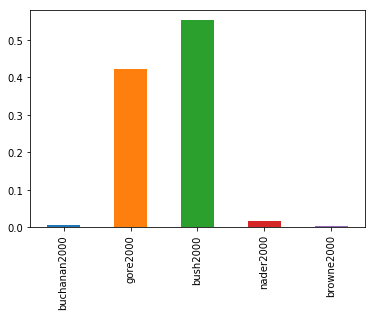

In [12]:
votes_props = (votes_df.loc[:, "buchanan2000":"browne2000"]
               .divide(votes_df.loc[:, "buchanan2000":"browne2000"]
                       .sum(axis=1), axis=0))
votes_props.loc[~votes_props.index.isin(['PALM BEACH'])].mean().plot.bar()

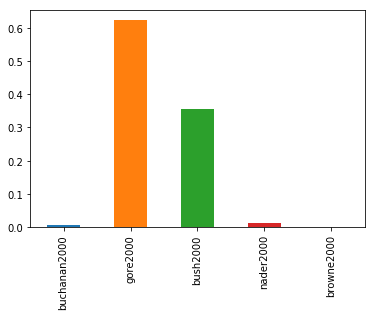

In [13]:
votes_props.loc["PALM BEACH", :].plot.bar()

At first glance, we can see that Palm Beach county has a larger proportion of voters that voted for Gore, both in the voter proportions for Palm Beach and the overall voter proportions as well. 

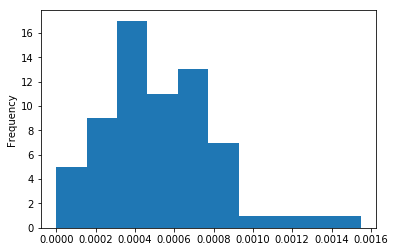

In [14]:
reform_props = votes_df["reform.reg"] / votes_df["total.reg"]
reform_props.loc[~reform_props.index.isin(['PALM BEACH'])].plot.hist()

In [15]:
reform_props.loc["PALM BEACH"]

0.00051317660889242179

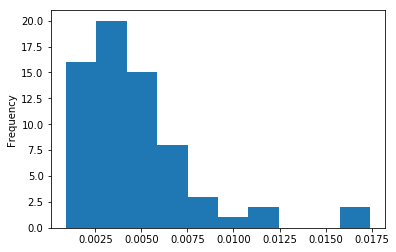

In [16]:
actual_reform_props = (votes_df.loc[:, "buchanan2000"]
                       .divide(votes_df.loc[:, "buchanan2000":"browne2000"]
                       .sum(axis=1), axis=0))
actual_reform_props.plot.hist()

In [17]:
actual_reform_props.loc["PALM BEACH"]

0.0078956211399636156

By looking at the difference between the proportion of reform voters that registered (relative to total registered) and the proportion of voters that voted reform (relative to total votes), we are able to create a distribution of those differences. This will help us decide whether the ballot design had any real effect on the voting numbers.

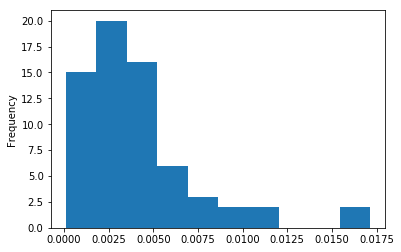

In [18]:
reform_props_diff = actual_reform_props - reform_props
reform_props_diff.loc[~reform_props_diff.index.isin(['PALM BEACH'])].plot.hist()

In [19]:
reform_props_diff.loc["PALM BEACH"]

0.0073824445310711941

When compared with the distribution of the reform vote differences (registered vs actual), the reform turnout for Palm Beach seems reasonable, and does not seem to have been affected by the ballot. The Palm Beach difference of approximately (0.0073) is not an outlier in this distribution, and there exists a number of counties that had around the same difference. From this, we can conclude that the ballot did not in fact have any effect of the election.

# Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.
2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)
3. Upload the PDF [to PolyLearn](https://polylearn.calpoly.edu/AY_2018-2019/mod/assign/view.php?id=313949).